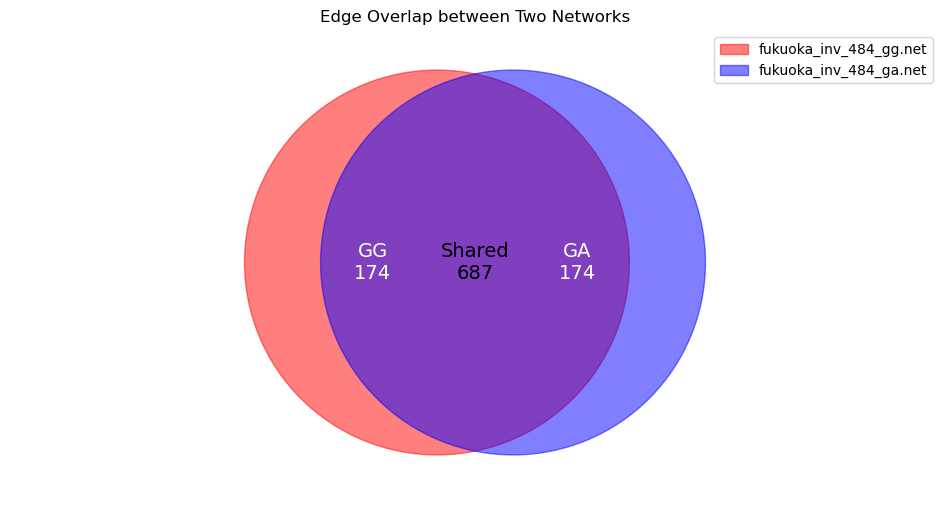

Venn diagram saved as: ../newnotebook4/output_venn/11.png


In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import math

# File paths
file1_path = "../networks_clusters/fukuoka_ascend_484_gg.net"
file2_path = "../networks_clusters/fukuoka_ascend_484_gg_ga.net"

# Read edges from file
def read_edges(filepath):
    edges = set()
    with open(filepath, 'r') as file:
        lines = file.readlines()
        edges_start = lines.index("*Edges\n") + 1
        for line in lines[edges_start:]:
            source, target = map(int, line.split()[:2])
            edges.add((source, target))
    return edges

# Load edges
edges1 = read_edges(file1_path)
edges2 = read_edges(file2_path)

# Calculate edge counts and shared edges
edges1_count = len(edges1)
edges2_count = len(edges2)
shared_edges_count = len(edges1 & edges2)

# Calculate circle radius (proportional to area)
scale_factor = 40
r1 = math.sqrt(edges1_count / math.pi) / scale_factor  # Reduce scale for better visibility
r2 = math.sqrt(edges2_count / math.pi) / scale_factor

# Set overlap area as 3/4 of r1's area
overlap_area = math.pi * (r1**2) * 0.75

# Calculate circle distance
def calculate_distance_fixed_overlap(r1, r2, overlap_area):
    def circle_overlap(d, r1, r2):
        if d >= r1 + r2:
            return 0  # No overlap
        elif d <= abs(r1 - r2):
            return math.pi * min(r1, r2)**2  # One circle inside the other
        else:
            part1 = r1**2 * math.acos((d**2 + r1**2 - r2**2) / (2 * d * r1))
            part2 = r2**2 * math.acos((d**2 + r2**2 - r1**2) / (2 * d * r2))
            part3 = 0.5 * math.sqrt((-d + r1 + r2) * (d + r1 - r2) * (d - r1 + r2) * (d + r1 + r2))
            return part1 + part2 - part3

    low, high = 0, r1 + r2
    while high - low > 1e-5:
        mid = (low + high) / 2
        if circle_overlap(mid, r1, r2) < overlap_area:
            high = mid
        else:
            low = mid
    return (low + high) / 2

distance = calculate_distance_fixed_overlap(r1, r2, overlap_area)

# Center the circles
center_x = 0.5
circle1_x = center_x - distance / 2
circle2_x = center_x + distance / 2

# Plot the Venn diagram with adjustments
fig, ax = plt.subplots(figsize=(12, 12))  # Increase canvas size

# Draw circles with adjusted radii
circle1 = Circle((circle1_x, 0.5), r1, color="red", alpha=0.5, label="fukuoka_inv_484_gg.net")
circle2 = Circle((circle2_x, 0.5), r2, color="blue", alpha=0.5, label="fukuoka_inv_484_ga.net")
ax.add_patch(circle1)
ax.add_patch(circle2)

# Add text, ensuring it is within the colored regions
ax.text(circle1_x - r1 / 3, 0.5, f"GG\n{edges1_count - shared_edges_count}", ha="center", va="center", fontsize=14, color="white")
ax.text(circle2_x + r2 / 3, 0.5, f"GA\n{edges2_count - shared_edges_count}", ha="center", va="center", fontsize=14, color="white")
ax.text((circle1_x + circle2_x) / 2, 0.5, f"Shared\n{shared_edges_count}", ha="center", va="center", fontsize=14)

# Adjust axis limits to center the circles
ax.set_xlim(-0.5, 1.5)  # Expand axis range for better visualization
ax.set_ylim(0, 1)
ax.set_aspect('equal')

# Add legend and title
ax.legend(loc="upper right")
plt.axis("off")
plt.title("Edge Overlap between Two Networks")

# Save and display the diagram
output_path = f"../newnotebook4/output_venn/11.png"
plt.savefig(output_path, dpi=300)
plt.show()

print(f"Venn diagram saved as: {output_path}")
